<a href="https://colab.research.google.com/github/RohanC07/Msc-Thesis-DataScience/blob/main/IMMA_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classifying Historical Ships by Speed Profiles: A Machine Learning Approach**
The goal of this project is to figure out whether a ship in the ICOADS data was a sailing ship or a powered or steam ship. To do this, we are going to use data from two years: 1849 and 1949. The reason is simple — in 1849, almost all ships were sailing ships, while in 1949, almost all ships were powered by engines. Using these two clear examples, we can train a model to learn the differences between sailing and powered ships. Once the model understands these differences, it can then be used to study other years where both types of ships were in use.

## **Step 1 : Install the pyIMMA library directly from its GitHub repository.**
pyIMMA is a Python package for reading IMMA (International Maritime Meteorological Archive) formatted files, which is the format used in ICOADS (International Comprehensive Ocean-Atmosphere Data Set).

In [1]:
!pip install git+https://github.com/philip-brohan/pyIMMA.git

  Cloning https://github.com/philip-brohan/pyIMMA.git to /tmp/pip-req-build-d92xnges
  Running command git clone --filter=blob:none --quiet https://github.com/philip-brohan/pyIMMA.git /tmp/pip-req-build-d92xnges
  Resolved https://github.com/philip-brohan/pyIMMA.git to commit a920a91a0324fd6e6cc8023473fe70e16490316f
  Preparing metadata (setup.py) ... done
  Created wheel for IMMA: filename=IMMA-0.0.3-py3-none-any.whl size=14813 sha256=aec45bd3aac8468e3933f14550f7d49f130368dd3afb75a0ede929eac3cac33f
  Stored in directory: /tmp/pip-ephem-wheel-cache-m3llaga2/wheels/fa/ca/ef/4b3f622698544453fe171cb1735441a58796b6e5a2bdfc2c44
Successfully built IMMA


## **Step 2 : Import the Google Drive module from Colab**

In [2]:
# Mount Google Drive to the Colab environment at the folder path '/content/drive'
# This allows to access files stored in your Google Drive directly from Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Step 3: Loading ICOADS IMMA Data (1849 & 1949**)
In this step, we load ship observation data from the ICOADS dataset for the years 1849 and 1949.

*  The files are in IMMA format (International Maritime Meteorological Archive) and stored in monthly .gz files.

*  We use the glob library to collect all files for each year and loop through them in January–December order.

*  Each file is read using the IMMA.read() function, then converted into a pandas DataFrame.
*  After reading all monthly files, we combine them into a single DataFrame for 1849 and another for 1949.

For the 1849 dataset, the "HR" (hour of observation) column is often missing. To handle this, replace missing values with 12.0, assuming the observation was made around noon.

Finally, print the size (rows and columns) of both datasets and set pandas to display all columns when viewing the data.

In [3]:
import IMMA
import pandas as pd
import glob

# Load all 1849 files
imma_list = []
files_1849 = glob.glob("/content/drive/MyDrive/icoads_extracted/imma_1849/*.gz")  # 12 monthly files

for file in sorted(files_1849):  # sorted = keeping Jan–Dec order
    data = IMMA.read(file)
    imma_list.append(pd.DataFrame.from_dict(data))

imma_1849 = pd.concat(imma_list, ignore_index=True)

# Load all 1949 files
imma_list = []
files_1949 = glob.glob("/content/drive/MyDrive/icoads_extracted/imma_1949_1/*.gz")

for file in sorted(files_1949): # sorted = keeping Jan–Dec order
    data = IMMA.read(file)
    imma_list.append(pd.DataFrame.from_dict(data))

imma_1949 = pd.concat(imma_list, ignore_index=True)

# Fill missing hour in 1849
imma_1849.fillna({"HR": 12.0}, inplace=True)  # assuming noon where missing

# Check dataset sizes
print("1849 shape:", imma_1849.shape)
print("1949 shape:", imma_1949.shape)

pd.set_option('display.max_columns', None)


/tmp/ipython-input-3610543908.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  imma_1849 = pd.concat(imma_list, ignore_index=True)


1849 shape: (48260, 128)
1949 shape: (712587, 191)


In [4]:
# Reading the imma_1849 file
imma_1849

,attachments,YR,MO,DY,HR,LAT,LON,IM,ATTC,TI,LI,DS,VS,NID,II,ID,C1,DI,D,WI,W,VI,VV,WW,W1,SLP,A,PPP,IT,AT,WBTI,WBT,DPTI,DPT,SI,SST,N,NH,CL,HI,H,CM,CH,WD,WP,WH,SD,SP,SH,BSI,B10,B1,DCK,SID,PT,DUPS,DUPC,TC,PB,WX,SX,C2,SQZ,SQA,AQZ,AQA,UQZ,UQA,VQZ,VQA,PQZ,PQA,DQZ,DQA,ND,SF,AF,UF,VF,PF,RF,ZNC,WNC,BNC,XNC,YNC,PNC,ANC,GNC,DNC,SNC,CNC,ENC,FNC,TNC,QCE,LZ,QCZ,UID,RN1,RN2,RN3,RSA,IRF,SUPD,OTV,OTZ,OSV,OSZ,OOV,OOZ,OPV,OPZ,OSIV,OSIZ,ONV,ONZ,OPHV,OPHZ,OCV,OCZ,OAV,OAZ,OPCV,OPCZ,ODV,ODZ,PUID
0,"[0, 1, 98, 99]",1849,1,1,12.0,53.00,349.67,1,3,NaN,4,None,None,None,10.0,BRUTUS,None,1.0,90.0,NaN,NaN,None,None,None,None,NaN,None,None,7.0,7.8,None,None,None,None,NaN,4.4,None,None,None,None,None,None,None,None,None,None,None,None,None,None,140,30,701,69,5,0,NaN,1.0,NaN,None,None,None,9.0,11.0,None,None,None,None,None,None,None,None,None,None,NaN,6,1,15,15,15,15,7,7,10,10,10,10,1,10,10,9,10,10,10,10,None,None,None,00I64S,3,1,0,2,1,770578118490101 5300N 1020WW 10025 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[0, 1, 98, 99]",1849,1,1,12.0,51.27,327.47,1,3,NaN,4,None,None,None,10.0,JOS.MEIG,None,1.0,68.0,5.0,22.6,None,None,None,None,NaN,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,138,12,701,69,5,0,NaN,1.0,NaN,None,None,None,NaN,NaN,None,None,None,None,None,None,None,None,None,None,NaN,15,15,2,1,15,15,7,1,10,10,10,10,10,10,10,10,10,10,10,10,None,None,None,00I64Q,3,1,0,2,1,310636118490101 5116N 3232W ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[0, 1, 98, 99]",1849,1,1,12.0,51.17,350.06,1,3,NaN,3,None,None,None,10.0,DIADEM,None,NaN,NaN,NaN,NaN,None,None,None,None,1009.7,None,None,7.0,11.1,None,None,None,None,NaN,10.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,141,19,701,69,5,0,NaN,1.0,2.0,None,None,None,17.0,7.0,None,None,None,None,None,None,None,None,None,None,NaN,1,1,15,15,1,15,7,10,10,10,10,1,1,10,10,1,10,10,10,10,None,None,None,00I64T,3,1,0,2,1,230368118490101 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[0, 1, 98, 99]",1849,1,1,12.0,50.53,340.50,1,3,NaN,4,None,None,None,10.0,ATLAS,None,1.0,113.0,NaN,NaN,None,None,None,None,NaN,None,None,7.0,11.1,None,None,None,None,NaN,11.1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,140,9,701,69,5,0,NaN,1.0,NaN,None,None,None,17.0,8.0,None,None,None,None,None,None,None,None,None,None,NaN,1,1,15,15,15,15,7,7,10,10,10,10,1,10,10,1,10,10,10,10,None,None,None,00I64R,3,1,0,2,1,770598118490101 5032N 1930W ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[0, 1, 98, 99]",1849,1,1,12.0,49.58,350.22,1,3,NaN,4,None,None,None,10.0,HOME,None,1.0,158.0,5.0,NaN,None,None,None,None,NaN,None,None,7.0,9.4,None,None,None,None,NaN,12.8,None,None,None,None,None,None,None,None,None,None,None,None,None,None,177,99,701,69,5,0,NaN,1.0,NaN,None,None,None,21.0,7.0,None,None,None,None,None,None,None,None,None,None,NaN,1,1,15,15,15,15,7,7,10,10,10,10,1,10,10,1,10,10,10,10,None,None,None,00I65F,3,1,0,2,1,730265118490101 4935N 947WW 81800 2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48255,"[0, 1, 98, 99]",1849,12,31,13.0,-10.81,103.07,1,3,0.0,6,None,None,None,10.0,1943,NL,NaN,180.0,5.0,1.0,None,None,None,None,NaN,None,None,NaN,NaN,None,None,None,None,NaN,NaN,Non

In [5]:
# Reading the imma_1949 file
imma_1949

,attachments,YR,MO,DY,HR,LAT,LON,IM,ATTC,TI,LI,DS,VS,NID,II,ID,C1,DI,D,WI,W,VI,VV,WW,W1,SLP,A,PPP,IT,AT,WBTI,WBT,DPTI,DPT,SI,SST,N,NH,CL,HI,H,CM,CH,WD,WP,WH,SD,SP,SH,BSI,B10,B1,DCK,SID,PT,DUPS,DUPC,TC,PB,WX,SX,C2,SQZ,SQA,AQZ,AQA,UQZ,UQA,VQZ,VQA,PQZ,PQA,DQZ,DQA,ND,SF,AF,UF,VF,PF,RF,ZNC,WNC,BNC,XNC,YNC,PNC,ANC,GNC,DNC,SNC,CNC,ENC,FNC,TNC,QCE,LZ,QCZ,UID,RN1,RN2,RN3,RSA,IRF,SUPD,OS,OP,FM,IMMV,IX,W2,WMI,SD2,SP2,SH2,IS,ES,RS,IC1,IC2,IC3,IC4,IC5,IR,RRR,TR,NU,QCI,QI1,QI2,QI3,QI4,QI5,QI6,QI7,QI8,QI9,QI10,QI11,QI12,QI13,QI14,QI15,QI16,QI17,QI18,QI19,QI20,QI21,HDG,COG,SOG,SLL,SLHH,RWD,RWS,QI22,QI23,QI24,QI25,QI26,QI27,QI28,QI29,RH,RHI,AWSI,IMONO,OTV,OTZ,OSV,OSZ,OOV,OOZ,OPV,OPZ,OSIV,OSIZ,ONV,ONZ,OPHV,OPHZ,OCV,OCZ,OAV,OAZ,OPCV,OPCZ,ODV,ODZ,PUID
0,"[0, 1, 98, 99]",1949,1,1.0,0.00,71.50,34.50,1,3,0.0,1,NaN,NaN,None,9.0,047,None,0.0,90.0,6.0,9.3,0.0,96.0,73.0,7.0,996.4,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,37,14,196,1,0.0,1,2.0,None,None,NaN,NaN,None,NaN,NaN,None,None,None,None,None,None,None,None,None,None,1.0,15,1,2,1,1,15,1,1,1,1,1,1,1,10,10,10,1,10,10,10,None,None,None,0O0ZWC,3,0,0,2,1,155}00043000471094095 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[0, 1, 98, 99]",1949,1,1.0,0.00,71.50,35.50,1,3,0.0,1,NaN,NaN,None,9.0,002,None,0.0,90.0,6.0,9.3,0.0,98.0,2.0,2.0,996.4,NaN,NaN,0.0,1.5,NaN,NaN,NaN,NaN,10.0,3.8,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,37,15,196,1,0.0,1,2.0,None,None,NaN,NaN,None,18.0,17.0,None,None,None,None,None,None,None,None,None,None,1.0,1,1,2,1,1,15,1,1,1,1,1,1,1,10,10,1,1,10,10,10,None,None,None,0O0ZWD,3,0,0,2,1,155}00058000021094 9 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[0, 1, 98, 99]",1949,1,1.0,0.00,69.50,15.50,1,3,0.0,1,NaN,NaN,None,9.0,039,None,0.0,150.0,6.0,4.6,0.0,99.0,1.0,0.0,983.1,NaN,NaN,0.0,3.7,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,107,95,196,1,0.0,1,2.0,None,None,NaN,NaN,None,NaN,NaN,None,None,None,None,None,None,None,None,None,None,1.0,15,1,1,1,1,15,1,1,1,1,1,1,1,10,10,10,1,10,10,10,None,None,None,0O0ZWK,3,0,0,2,1,155}00016000392152 9 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[0, 1, 98, 99]",1949,1,1.0,0.00,62.50,5.50,1,3,0.0,1,NaN,NaN,None,9.0,023,None,0.0,170.0,6.0,6.7,0.0,97.0,3.0,2.0,970.1,NaN,NaN,0.0,7.2,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,106,25,196,1,0.0,1,2.0,None,None,NaN,NaN,None,NaN,NaN,None,None,None,None,None,None,None,None,None,None,1.0,15,1,1,1,1,15,1,1,1,1,1,1,1,10,10,10,1,10,10,10,None,None,None,0O0ZWJ,3,0,0,2,1,155}00028000232173273 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[0, 1, 98, 99]",1949,1,1.0,0.00,62.50,347.50,1,3,0.0,1,NaN,NaN,None,9.0,038,None,0.0,60.0,6.0,15.4,0.0,97.0,2.0,2.0,977.6,NaN,NaN,0.0,3.2,NaN,Na

## **Step 4 : Calculating Ship Speed and Heading from ICOADS Data**
In this step, we create functions to calculate the distance, speed, and heading (bearing) of ships based on their recorded latitude, longitude, and time of observation.


In [6]:
import numpy as np
import pandas as pd

# This function was generate by google Colab - I have added test code below.
def great_circle_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the distance between two points on the Earth (specified in decimal degrees)
    using the Haversine formula (a variant of the great-circle distance).

    Args:
        lat1 (float): Latitude of the first point.
        lon1 (float): Longitude of the first point.
        lat2 (float): Latitude of the second point.
        lon2 (float): Longitude of the second point.

    Returns:
        float: Distance between the two points in kilometers.
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers. Use 3956 for miles
    return c * r

# This function was generate by google Colab - I have added test code below.
def calculate_bearing(lat1, lon1, lat2, lon2):
    """
    Calculate the bearing between two points on the Earth (specified in decimal degrees).

    Args:
        lat1 (float): Latitude of the first point.
        lon1 (float): Longitude of the first point.
        lat2 (float): Latitude of the second point.
        lon2 (float): Longitude of the second point.

    Returns:
        float: Bearing in degrees.
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Calculate bearing
    dlon = lon2 - lon1
    y = np.sin(dlon) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(dlon)
    bearing = np.arctan2(y, x)

    # Convert bearing to degrees and normalize to 0-360
    return np.mod(np.degrees(bearing),360)


# add calculated speed and bearings
def calculate_distances_bearings(df0):
  """
  Add date, inferred speed and inferred heading columns to a dataframe

  Args:
    df0 (pandas.DataFrame): The input dataframe

  Returns:
    pandas.DataFrame: The input dataframe with additional columns
  """
  df1 = df0.copy()
  df1["date"] = pd.to_datetime({"year":df1["YR"], "month":df1["MO"], "day":df1["DY"], "hour":df1["HR"]}, errors='coerce')
  df1["shipspeed"] = np.nan
  df1["shiphead"]  = np.nan

  result = []
  # loop over ships
  for key,df in df1.groupby("ID"):
    df = df.reset_index()
    """
    # SLOW VERSION: this code uses a loop to calculate the speed and heading
    # loop over entries for that ship, excluding first and last
    for i in range(1,len(df)):
      # calculate the bearing and speed from yesterday's location to today
      dt = (df.loc[i,"date"] - df.loc[i-1,"date"]).total_seconds() / 3600.0
      if dt > 3 and dt < 36: # if less than 2.5 days
        d = great_circle_distance(df.loc[i-1,"LAT"], df.loc[i-1,"LON"], df.loc[i,"LAT"], df.loc[i,"LON"])
        if d < 1200: # the data contain some errors, so we exclude ships which travel more than 1200km/day
          df.loc[i,"shipspeed"] = d / dt
          df.loc[i,"shiphead"]  = calculate_bearing(df.loc[i-1,"LAT"], df.loc[i-1,"LON"], df.loc[i,"LAT"], df.loc[i,"LON"])
    result.append(df)
    """
    # FAST VERSION: this is a loop-free optimised version of the code above
    lats = df["LAT"].values
    lons = df["LON"].values
    dates = df["date"].values
    shipspeed = np.full(len(df),np.nan)
    shiphead = np.full(len(df),np.nan)
    dt = ( dates[1:] - dates[:-1] ) / np.timedelta64(1, 'h')
    dt[ (dt < 3) | (dt > 36) ] = np.nan  # eliminate observations too close or distant in time
    shipspeed[1:] = great_circle_distance(lats[:-1],lons[:-1],lats[1:],lons[1:]) / dt
    shiphead[1:] = calculate_bearing(lats[:-1],lons[:-1],lats[1:],lons[1:])
    mask = (shipspeed > 0.0) & (shipspeed < 40.0)  # eliminate impossible ship speeds
    shipspeed[~mask] = np.nan
    shiphead[~mask] = np.nan
    df["shipspeed"] = shipspeed
    df["shiphead"] = shiphead
    result.append(df)
  return pd.concat(result)


# Test case for AI generated functions
# latitude/longitude of London
london_lat = 51.5074
london_lon = -0.1278
# latitude/longitude of New York
new_york_lat = 40.7128
new_york_lon = -74.0060
# test the functions using values from https://www.movable-type.co.uk/scripts/latlong.html
assert np.isclose( great_circle_distance(london_lat, london_lon, new_york_lat, new_york_lon), 5570., atol=1. )
assert np.isclose( great_circle_distance(new_york_lat, new_york_lon, london_lat, london_lon), 5570., atol=1. )
assert np.isclose( calculate_bearing(london_lat, london_lon, new_york_lat, new_york_lon), 288., atol=1. )
assert np.isclose( calculate_bearing(new_york_lat, new_york_lon, london_lat, london_lon), 51., atol=1. )

# Fill in the distances and bearings calculated from the lat/lon data
imma_1849 = calculate_distances_bearings(imma_1849)
imma_1949 = calculate_distances_bearings(imma_1949)
imma_1849

,index,attachments,YR,MO,DY,HR,LAT,LON,IM,ATTC,TI,LI,DS,VS,NID,II,ID,C1,DI,D,WI,W,VI,VV,WW,W1,SLP,A,PPP,IT,AT,WBTI,WBT,DPTI,DPT,SI,SST,N,NH,CL,HI,H,CM,CH,WD,WP,WH,SD,SP,SH,BSI,B10,B1,DCK,SID,PT,DUPS,DUPC,TC,PB,WX,SX,C2,SQZ,SQA,AQZ,AQA,UQZ,UQA,VQZ,VQA,PQZ,PQA,DQZ,DQA,ND,SF,AF,UF,VF,PF,RF,ZNC,WNC,BNC,XNC,YNC,PNC,ANC,GNC,DNC,SNC,CNC,ENC,FNC,TNC,QCE,LZ,QCZ,UID,RN1,RN2,RN3,RSA,IRF,SUPD,OTV,OTZ,OSV,OSZ,OOV,OOZ,OPV,OPZ,OSIV,OSIZ,ONV,ONZ,OPHV,OPHZ,OCV,OCZ,OAV,OAZ,OPCV,OPCZ,ODV,ODZ,PUID,date,shipspeed,shiphead
0,19031,"[0, 1, 98, 99]",1849,5,15,16.0,15.63,296.00,1,3,0.0,6,None,None,None,10.0,10,NL,NaN,127.0,5.0,4.6,None,None,None,None,1024.0,None,None,7.0,28.3,None,None,None,None,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,279,54,730,133,5,0,NaN,NaN,NaN,None,None,None,NaN,NaN,None,None,None,None,None,None,None,None,None,None,2.0,15,1,1,1,7,15,1,1,10,10,10,1,1,10,10,10,10,10,10,10,None,None,None,00IKQR,3,1,0,2,1,NAN NATIONAAL ARCHIEF OF THE NETHERLANDS ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1849-05-15 16:00:00,NaN,NaN
1,19175,"[0, 1, 98, 99]",1849,5,16,16.0,12.92,295.10,1,3,0.0,6,None,None,None,10.0,10,NL,NaN,116.0,5.0,6.7,None,None,None,None,1018.7,None,None,7.0,27.8,None,None,None,None,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,279,24,730,133,5,0,NaN,NaN,NaN,None,None,None,NaN,NaN,None,None,None,None,None,None,None,None,None,None,2.0,15,1,1,1,3,15,1,1,10,10,10,1,1,10,10,10,10,10,10,10,None,None,None,00IKUO,3,1,0,2,1,NAN NATIONAAL ARCHIEF OF THE NETHERLANDS ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1849-05-16 16:00:00,13.189906,197.953618
2,19322,"[0, 1, 98, 99]",1849,5,17,16.0,10.75,293.68,1,3,0.0,6,None,None,None,10.0,10,NL,NaN,117.0,5.0,2.6,None,None,None,None,1018.7,None,None,7.0,27.2,None,None,None,None,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,279,6,730,133,5,0,NaN,NaN,NaN,None,None,None,NaN,NaN,None,None,None,None,None,None,None,None,None,None,2.0,15,1,1,1,5,15,1,1,10,10,10,1,1,10,10,10,10,10,10,10,None,None,None,00IKYO,3,1,0,2,1,NAN NATIONAAL ARCHIEF OF THE NETHERLANDS ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1849-05-17 16:00:00,11.938916,212.786771
3,23489,"[0, 1, 98, 99]",1849,6,14,17.0,15.01,291.28,1,3,0.0,6,None,None,None,10.0,10,NL,NaN,94.0,5.0,4.6,None,None,None,None,1022.7,None,None,7.0,27.8,None,None,None,None,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,279,58,730,133,5,0,NaN,NaN,NaN,None,None,None,NaN,NaN,None,None,None,None,None,None,None,None,None,None,2.0,15,1,1,1,7,15,1,1,10,10,10,1,1,10,10,10,10,10,10,10,None,None,None,00IO42,3,1,0,2,1,NAN NATIONAAL ARCHIEF OF THE NETHERLANDS ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1849-06-14 17:00:00,NaN,NaN
4,23641,"[0, 1, 98, 99]",1849,6,15,17.0,15.83,292.13,1,3,0.0,6,None,None,None,10.0,10,NL,NaN,83.0,5.0,2.6,None,None,None,None,1020.0,None,None,7.0,28.3,None,None,None,None,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,279,57,730,133,5,0,NaN,NaN,NaN,None,None,None,NaN,NaN,None,None,None,None,None,None,None,None,None,None,2.0,15,1,1,1,5,15,1,1,10,10,10,1,1,10,10,10,10,10,10,10,None,None,None,00IO87,3,1,0,2,1,NAN NATIONAAL ARCHIEF OF THE NETHERLANDS ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1849-06-15 17:00:00,5.370836,44.866870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## **Visualisation 1 : Comparing Ship Speeds in 1849 vs 1949**

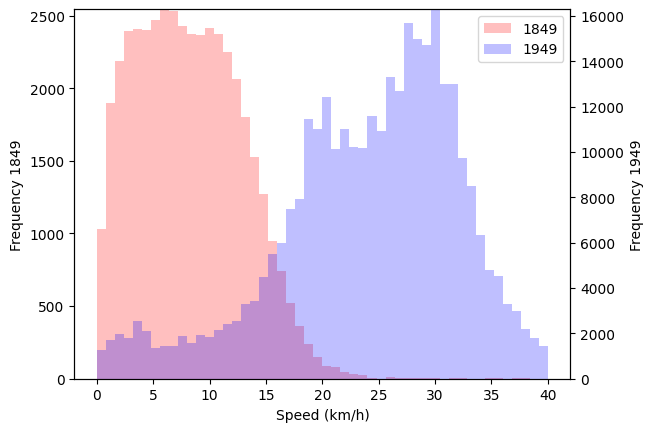

In [7]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
v1849 = imma_1849['shipspeed'].values
v1949 = imma_1949['shipspeed'].values
v1849 = v1849[v1849>0.0]
v1949 = v1949[v1949>0.0]
ax2 = ax1.twinx()
counts,bins,l1 = ax1.hist(v1849,bins=50,range=[0,40],alpha=0.25,color='r',label='1849')
ax1.set_ylim((0,max(counts)))
ax1.set_ylabel('Frequency 1849')
counts,bins,l2 = ax2.hist(v1949,bins=50,range=[0,40],alpha=0.25,color='b',label='1949')
ax2.set_ylim((0,max(counts)))
ax2.set_ylabel('Frequency 1949')
plt.legend([l1,l2],["1849","1949"])
ax1.set_xlabel('Speed (km/h)')
plt.show()

## **Visualisation 2 : Polar Plots of Ship Speed vs. Bearing Relative to Wind**

/tmp/ipython-input-3217640405.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


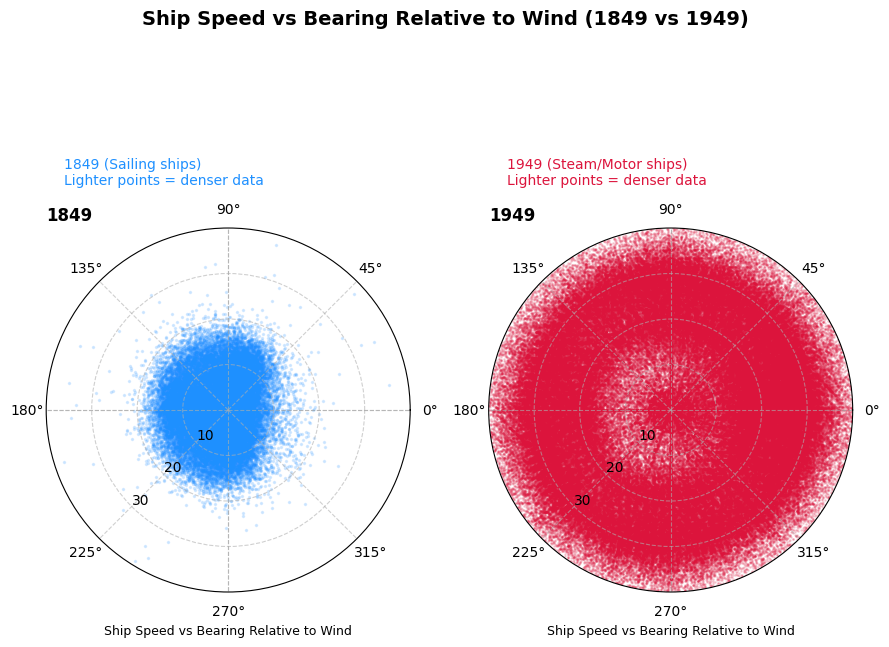

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Compute bearing differences (wrapped to [-π, π])
imma_1849["bearing_diff"] = np.radians((imma_1849["shiphead"] - imma_1849["D"] + 180) % 360 - 180)
imma_1949["bearing_diff"] = np.radians((imma_1949["shiphead"] - imma_1949["D"] + 180) % 360 - 180)

# Create polar subplots
fig, axs = plt.subplots(
    1, 2,
    figsize=(9, 8),
    subplot_kw={'projection': 'polar'},
    layout='constrained'
)

# Plot 1849 data (sailing era: lighter blue points)
axs[0].plot(
    imma_1849["bearing_diff"],
    imma_1849["shipspeed"],
    '.',
    color='dodgerblue',
    alpha=0.15,   # reduced opacity for dense data
    ms=3,         # smaller points to avoid overplotting
    zorder=1
)

# Plot 1949 data (steam/motor era: lighter red points)
axs[1].plot(
    imma_1949["bearing_diff"],
    imma_1949["shipspeed"],
    '.',
    color='crimson',
    alpha=0.15,   # reduced opacity for dense data
    ms=2,         # smaller points, 1949 dataset typically denser
    zorder=1
)

# Configure both axes
for ax, year in zip(axs, ["1849", "1949"]):
    # Reference lines for upwind/downwind directions
    for angle in [0, np.pi/2, np.pi, -np.pi/2]:
        ax.plot([angle, angle], [0, 40], color='gray', lw=0.8, ls='--', alpha=0.5, zorder=0)

    # Axis settings
    ax.set_rmax(40)
    ax.set_rticks([10, 20, 30])
    ax.set_rlabel_position(-135)
    ax.set_title(f"{year}", loc="left", fontsize=12, weight='bold')
    ax.set_xlabel("Ship Speed vs Bearing Relative to Wind", fontsize=9)
    ax.grid(alpha=0.6, linestyle='--', zorder=0)

    # Tick label styling
    for label in ax.get_yticklabels():
        label.set_fontsize(10)
        label.set_color('black')
        label.set_zorder(10)

# Annotations for visual meaning
axs[0].annotate("1849 (Sailing ships)\nLighter points = denser data",
                xy=(0.05, 1.12), xycoords='axes fraction',
                fontsize=10, color='dodgerblue')
axs[1].annotate("1949 (Steam/Motor ships)\nLighter points = denser data",
                xy=(0.05, 1.12), xycoords='axes fraction',
                fontsize=10, color='crimson')

# Overall figure title
plt.suptitle("Ship Speed vs Bearing Relative to Wind (1849 vs 1949)",
             fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


## **Visualisation 3 : Relationship Between Wind Speed and Ship Speed**

/tmp/ipython-input-2644079636.py:46: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


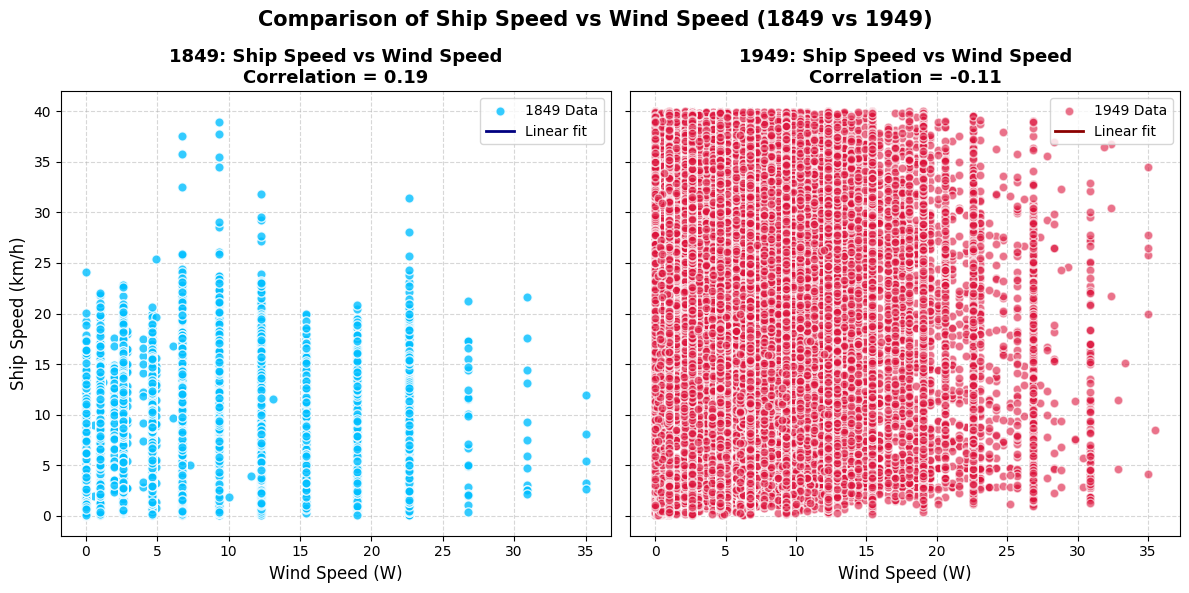

Numerical Correlations:
1849: 0.192
1949: -0.114


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Compute correlations
corr_1849 = imma_1849[["W", "shipspeed"]].corr().iloc[0, 1]
corr_1949 = imma_1949[["W", "shipspeed"]].corr().iloc[0, 1]

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# --- 1849 plot ---
axes[0].scatter(
    imma_1849["W"], imma_1849["shipspeed"],
    color='deepskyblue', edgecolor='white', s=45, alpha=0.8, label='1849 Data', zorder=3
)

# Linear regression for 1849
slope_1849, intercept_1849, _, _, _ = linregress(imma_1849["W"], imma_1849["shipspeed"])
x_vals_1849 = np.linspace(imma_1849["W"].min(), imma_1849["W"].max(), 100)
axes[0].plot(x_vals_1849, slope_1849 * x_vals_1849 + intercept_1849, color='navy', lw=2, label='Linear fit')

axes[0].set_xlabel("Wind Speed (W)", fontsize=12)
axes[0].set_ylabel("Ship Speed (km/h)", fontsize=12)
axes[0].set_title(f"1849: Ship Speed vs Wind Speed\nCorrelation = {corr_1849:.2f}", fontsize=13, weight='bold')
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].legend()

# --- 1949 plot ---
axes[1].scatter(
    imma_1949["W"], imma_1949["shipspeed"],
    color='crimson', edgecolor='white', s=40, alpha=0.6, label='1949 Data', zorder=3
)

# Linear regression for 1949
slope_1949, intercept_1949, _, _, _ = linregress(imma_1949["W"], imma_1949["shipspeed"])
x_vals_1949 = np.linspace(imma_1949["W"].min(), imma_1949["W"].max(), 100)
axes[1].plot(x_vals_1949, slope_1949 * x_vals_1949 + intercept_1949, color='darkred', lw=2, label='Linear fit')

axes[1].set_xlabel("Wind Speed (W)", fontsize=12)
axes[1].set_title(f"1949: Ship Speed vs Wind Speed\nCorrelation = {corr_1949:.2f}", fontsize=13, weight='bold')
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].legend()

plt.suptitle("Comparison of Ship Speed vs Wind Speed (1849 vs 1949)", fontsize=15, weight='bold')
plt.tight_layout()
plt.show()

# Print correlation values in text for reference
print("Numerical Correlations:")
print(f"1849: {corr_1849:.3f}")
print(f"1949: {corr_1949:.3f}")


## **Step 5 : Experiment 1 - Ship Classification Using Machine Learning**
This builds machine learning models to classify ships as either 1849 (sailing) or 1949 (powered) based on their speed statistics.

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Combine datasets
df = pd.concat([imma_1849, imma_1949])
#print(df)
# STEP 1: Filter and clean
df_filtered = df.dropna(subset=['ID', 'shipspeed', 'YR'])
df_filtered = df_filtered.rename(columns={'shipspeed': 'speed'})
#for key,f in df_filtered.groupby(["ID","YR"]):
   # print(f)
#print(df_filtered)
# STEP 2: Group by ship ID and year and calculate speed statistics
stats_df = df_filtered.groupby(['ID', 'YR'])['speed'].agg(
    mean_speed='mean',
    min_speed='min',
    max_speed='max',
    q1_speed=lambda x: np.percentile(x, 25),
    q3_speed=lambda x: np.percentile(x, 75)
).reset_index()

print(stats_df)
# Rename for clarity
stats_df.rename(columns={'ID': 'ship_id', 'YR': 'year'}, inplace=True)

# STEP 3: Create binary target variable (flag: 0 = 1849, 1 = 1949)
stats_df['flag'] = stats_df['year'].apply(lambda x: 0 if x == 1849 else 1)
#print(stats_df)
# Optional: Check class balance
print("Class distribution:")
print(stats_df['flag'].value_counts())

# STEP 4: Prepare features and target
X = stats_df[['mean_speed', 'min_speed', 'max_speed', 'q1_speed', 'q3_speed']] # q1_speed = 25th percentile and q3_speed = 75th percentile
y = stats_df['flag']

# Train-test split (with stratification)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# STEP 5: Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# STEP 6: Train SVM with scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)
svc_preds = svc.predict(X_test_scaled)

# STEP 7: Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

# Evaluate both models
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("SVM", y_test, svc_preds)


/tmp/ipython-input-777046421.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([imma_1849, imma_1949])


             ID    YR  mean_speed  min_speed  max_speed   q1_speed   q3_speed
0       004      1949   16.662912   0.624519  38.949212  12.914612  19.732348
1       094      1949    5.474281   0.926624  39.034179   1.870030   6.149232
2       104      1949    6.516348   1.091927  39.851405   3.706498   7.534172
3       114      1949    6.552182   6.552182   6.552182   6.552182   6.552182
4       134      1949    5.337887   0.750828  37.571243   2.985555   5.954093
...         ...   ...         ...        ...        ...        ...        ...
4077  YORKSHIR   1849   13.897659   4.195961  18.990418  10.917301  17.674031
4078  YORKTOWN   1849    9.942357   0.370650  33.426962   6.143446  13.905554
4079  Y_EAG*_N   1849    8.534959   1.611562  14.618169   5.459235  11.693783
4080  ZAINE      1849    5.143037   5.143037   5.143037   5.143037   5.143037
4081  ZENOBIA    1849   10.960552   1.620268  23.596356   8.471033  13.421958

[4082 rows x 7 columns]
Class distribution:
flag
1    3673
0   

## **Visualisation 4 : Confusion Matrices for Random forest and SVC**

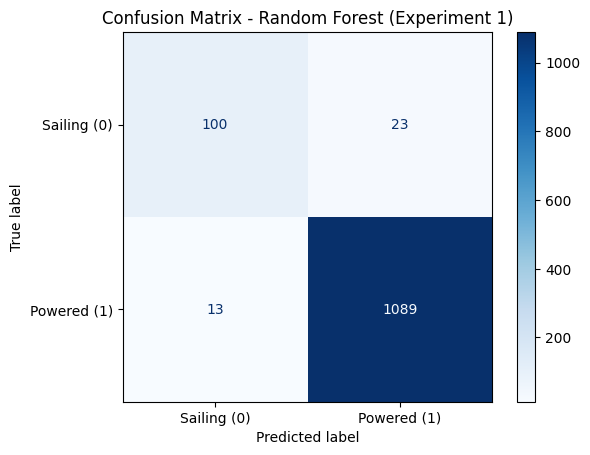

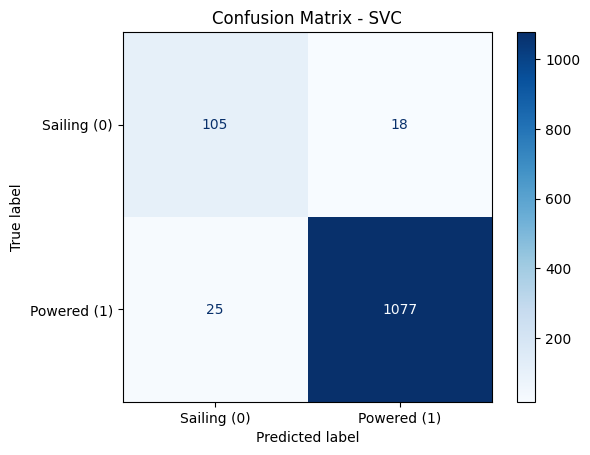

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf_preds, labels=[0,1])
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Sailing (0)", "Powered (1)"])
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest (Experiment 1)")
plt.show()

# Confusion Matrix for SVC
cm_svc = confusion_matrix(y_test, svc_preds, labels=[0,1])
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=["Sailing (0)", "Powered (1)"])
disp_svc.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SVC")
plt.show()


## **Visualisation 5 : Mean Ship Speed by Year**

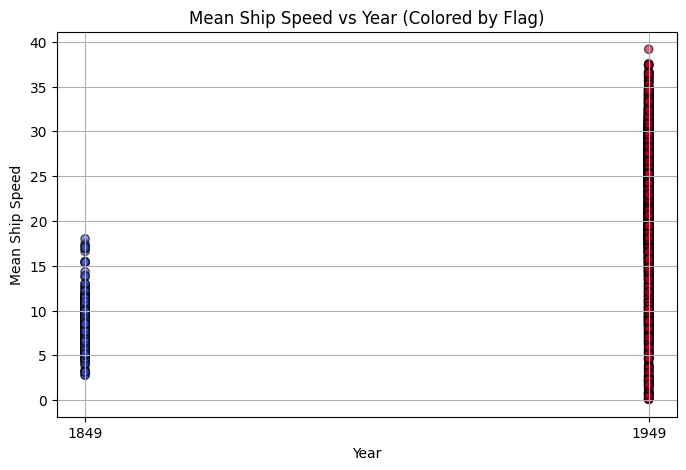

In [12]:
import matplotlib.pyplot as plt

# Plot figure for mean ship speed by year
plt.figure(figsize=(8, 5))
plt.scatter(stats_df['year'], stats_df['mean_speed'], c=stats_df['flag'], cmap='coolwarm', alpha=0.6, edgecolors='k')

# Label the plot
plt.xlabel('Year')
plt.ylabel('Mean Ship Speed')
plt.title('Mean Ship Speed vs Year (Colored by Flag)')
plt.xticks([1849, 1949])
plt.grid(True)
plt.show()


## **Step 6: Experiment 2 - Relative Speed Distribution (1849 vs 1949)**
This code analyzes the relationship between ship movement and wind direction by calculating a new feature called relative speed:

 **relative speed = ship speed × cos(ship heading−wind direction)**

If relative speed is **positive**, the ship is moving with the wind.

If relative speed is **negative**, the ship is moving against the wind.

/tmp/ipython-input-3714457351.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([imma_1849, imma_1949], ignore_index=True)


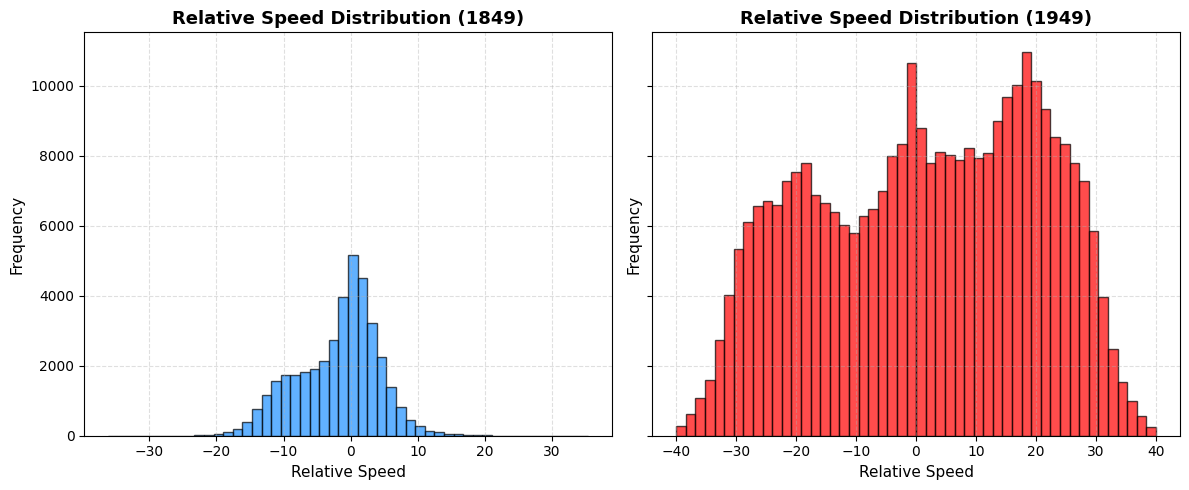

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate relative_speed for both datasets
imma_1849["relative_speed"] = imma_1849["shipspeed"] * np.cos(np.radians(imma_1849["shiphead"] - imma_1849["D"]))
imma_1949["relative_speed"] = imma_1949["shipspeed"] * np.cos(np.radians(imma_1949["shiphead"] - imma_1949["D"]))

# Combine into one dataframe for plotting
imma_1849["year"] = 1849
imma_1949["year"] = 1949
df = pd.concat([imma_1849, imma_1949], ignore_index=True)

# Plot histograms of relative_speed
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Define colors for each year
colors = {1849: "dodgerblue", 1949: "red"}

for ax, year in zip(axes, [1849, 1949]):
    subset = df[df["year"] == year]["relative_speed"].dropna()
    ax.hist(
        subset,
        bins=50,
        color=colors[year],
        edgecolor="black",
        alpha=0.7
    )
    ax.set_title(f"Relative Speed Distribution ({year})", fontsize=13, weight='bold')
    ax.set_xlabel("Relative Speed", fontsize=11)
    ax.set_ylabel("Frequency", fontsize=11)
    ax.grid(alpha=0.4, linestyle='--')

plt.tight_layout()
plt.show()

## **Step 7 : Experiment 2 - Random Forest Training**
In this experiment, we test whether ships can be classified as sailing (1849) or powered (1949) using the five-number summary of relative speed for each ship.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Five-number summary of relative speed per ship
rel_summary_df = df.groupby("ID")["relative_speed"].agg(
    min_rel="min",
    q1_rel=lambda x: x.quantile(0.25),
    median_rel="median",
    q3_rel=lambda x: x.quantile(0.75),
    max_rel="max"
).reset_index()

# Add label (year) for classification
rel_summary_df = rel_summary_df.merge(df[["ID", "year"]].drop_duplicates(), on="ID")

# Train/Test Split

X = rel_summary_df.drop(columns=["ID", "year"])
y = rel_summary_df["year"].apply(lambda x: 0 if x == 1849 else 1)  # 0 = sailing, 1 = powered

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.81      0.84       124
           1       0.99      0.99      0.99      1623

    accuracy                           0.98      1747
   macro avg       0.93      0.90      0.91      1747
weighted avg       0.98      0.98      0.98      1747



## **Experiment 2 - Support Vector Classifier (SVC)**

SVC Results (Relative Speed Features):
              precision    recall  f1-score   support

 Sailing (0)       0.85      0.86      0.86       124
 Powered (1)       0.99      0.99      0.99      1623

    accuracy                           0.98      1747
   macro avg       0.92      0.93      0.92      1747
weighted avg       0.98      0.98      0.98      1747



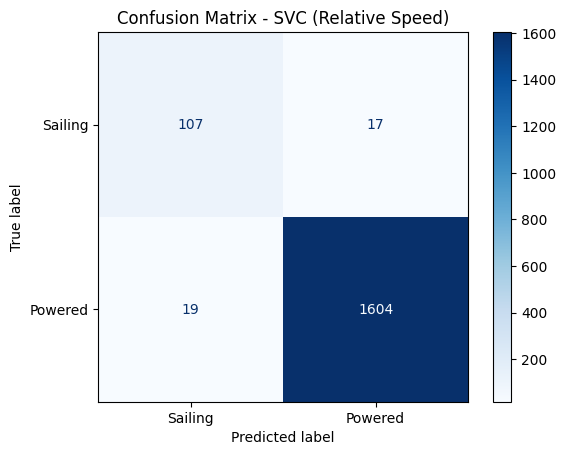

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Five-number summary of relative speed per ship
rel_summary_df = df.groupby("ID")["relative_speed"].agg(
    min_rel="min",
    q1_rel=lambda x: x.quantile(0.25),
    median_rel="median",
    q3_rel=lambda x: x.quantile(0.75),
    max_rel="max"
).reset_index()

# Add label (year) for classification
rel_summary_df = rel_summary_df.merge(df[["ID", "year"]].drop_duplicates(), on="ID")

# Features and Labels
X = rel_summary_df.drop(columns=["ID", "year"])
y = rel_summary_df["year"].apply(lambda x: 0 if x == 1849 else 1)  # 0 = sailing, 1 = powered

# Handle Missing Values (median imputation)
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, stratify=y, random_state=42)

# Train SVC
svc_model = SVC(kernel="rbf", C=10, gamma=0.01, random_state=42)
svc_model.fit(X_train, y_train)

# Predictions
y_pred_svc = svc_model.predict(X_test)

# Evaluation
print("SVC Results (Relative Speed Features):")
print(classification_report(y_test, y_pred_svc, target_names=["Sailing (0)", "Powered (1)"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svc, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sailing", "Powered"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SVC (Relative Speed)")
plt.show()


## **Experiment 3 - Support Vector Classifier**

/tmp/ipython-input-2487939220.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_df = df.groupby("ID").apply(


SVC Results (Experiment 3 - Ship Speed + Correlation):
              precision    recall  f1-score   support

 Sailing (0)       0.82      0.85      0.84       124
 Powered (1)       0.99      0.99      0.99      1623

    accuracy                           0.98      1747
   macro avg       0.91      0.92      0.91      1747
weighted avg       0.98      0.98      0.98      1747



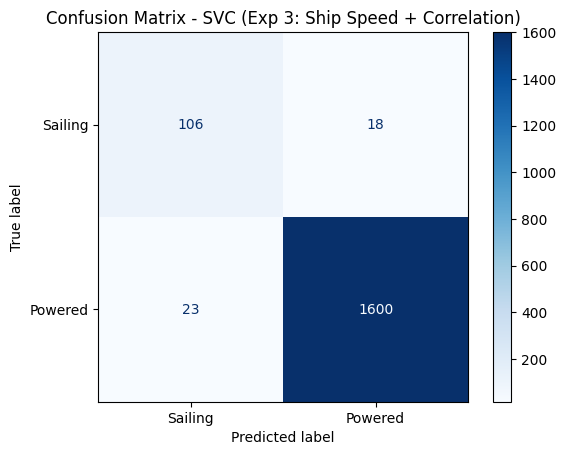

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Five-number summary of ship speed per ship
speed_summary_df = df.groupby("ID")["shipspeed"].agg(
    min_speed="min",
    q1_speed=lambda x: x.quantile(0.25),
    median_speed="median",
    q3_speed=lambda x: x.quantile(0.75),
    max_speed="max"
).reset_index()

# ---- Correlation (ship speed vs wind speed) ----
corr_df = df.groupby("ID").apply(
    lambda g: g[["shipspeed","W"]].corr().iloc[0,1] if g["W"].notna().sum() > 1 else np.nan
).reset_index(name="speed_wind_corr")

# Merge summary + correlation + year
exp3_df = speed_summary_df.merge(corr_df, on="ID").merge(df[["ID","year"]].drop_duplicates(), on="ID")

# Features & Labels
X = exp3_df.drop(columns=["ID","year"])
y = exp3_df["year"].apply(lambda x: 0 if x==1849 else 1)

# Handle NaN
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, stratify=y, random_state=42)

# Train SVC
svc_model = SVC(kernel="rbf", C=10, gamma=0.01, random_state=42)
svc_model.fit(X_train, y_train)

# Predictions
y_pred_svc = svc_model.predict(X_test)

# Results
print("SVC Results (Experiment 3 - Ship Speed + Correlation):")
print(classification_report(y_test, y_pred_svc, target_names=["Sailing (0)", "Powered (1)"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svc, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sailing","Powered"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SVC (Exp 3: Ship Speed + Correlation)")
plt.show()


## **Experiment 4: Visualisation of Random Forest Confusion Matrix**

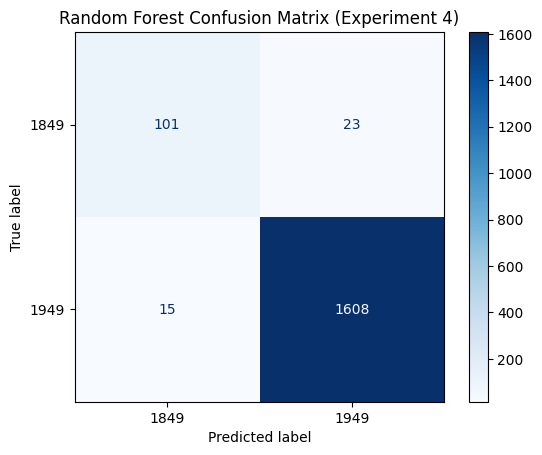

Confusion Matrix:
 [[ 101   23]
 [  15 1608]]


In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1849, 1949])
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix (Experiment 4)")
plt.show()

# Print raw numbers
print("Confusion Matrix:\n", cm)


## **Experiment 4 – SVC with Relative Speed + Correlation**

/tmp/ipython-input-3985882567.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_df = df.groupby("ID").apply(lambda g: g[["shipspeed","W"]].corr().iloc[0,1] if g["W"].notna().sum() > 1 else np.nan).reset_index(name="speed_wind_corr")


SVC Results (Experiment 4 - Relative Speed + Correlation):
              precision    recall  f1-score   support

 Sailing (0)       0.84      0.85      0.85       124
 Powered (1)       0.99      0.99      0.99      1623

    accuracy                           0.98      1747
   macro avg       0.92      0.92      0.92      1747
weighted avg       0.98      0.98      0.98      1747



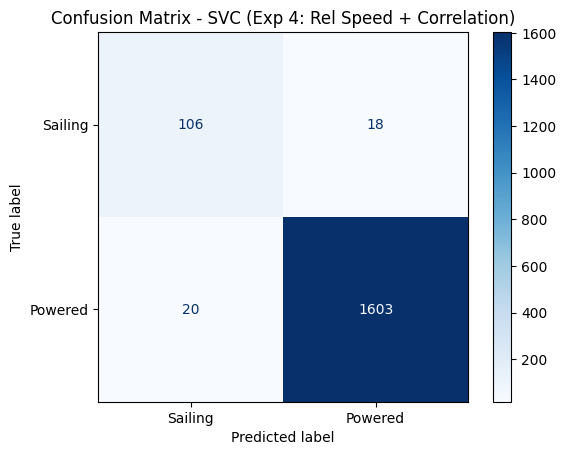

In [18]:
# Five-number summary of relative speed
rel_summary_df = df.groupby("ID")["relative_speed"].agg(
    min_rel="min",
    q1_rel=lambda x: x.quantile(0.25),
    median_rel="median",
    q3_rel=lambda x: x.quantile(0.75),
    max_rel="max"
).reset_index()

# Correlation (ship speed vs wind speed)
corr_df = df.groupby("ID").apply(lambda g: g[["shipspeed","W"]].corr().iloc[0,1] if g["W"].notna().sum() > 1 else np.nan).reset_index(name="speed_wind_corr")

# Merge summary + correlation + year
exp4_df = rel_summary_df.merge(corr_df, on="ID").merge(df[["ID","year"]].drop_duplicates(), on="ID")

# Features & Labels
X = exp4_df.drop(columns=["ID","year"])
y = exp4_df["year"].apply(lambda x: 0 if x==1849 else 1)

# Handle NaN
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, stratify=y, random_state=42)

# Train SVC
svc_model = SVC(kernel="rbf", C=10, gamma=0.01, random_state=42)
svc_model.fit(X_train, y_train)

# Predictions
y_pred_svc = svc_model.predict(X_test)

# Results
print("SVC Results (Experiment 4 - Relative Speed + Correlation):")
print(classification_report(y_test, y_pred_svc, target_names=["Sailing (0)", "Powered (1)"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svc, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sailing","Powered"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SVC (Exp 4: Rel Speed + Correlation)")
plt.show()


## **Step 8 :  Experiment 3 - Random Forest Classifier**
In this experiment, we apply a Random Forest Classifier to distinguish between sailing ships (1849) and powered ships (1949) using ship speed statistics and its relationship with wind.

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/tmp/ipython-input-3808737187.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns w

Experiment 3: Ship Speed + Correlation
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       124
           1       0.99      0.99      0.99      1623

    accuracy                           0.98      1747
   macro avg       0.92      0.92      0.92      1747
weighted avg       0.98      0.98      0.98      1747



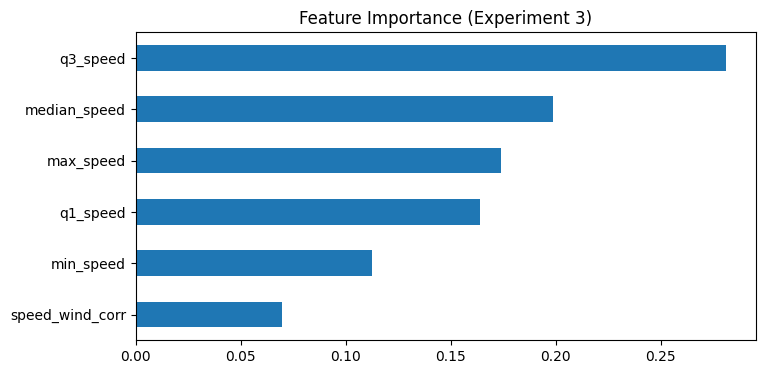

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# STEP 1: Five-number summary of ship speed
speed_summary_df = df.groupby("ID")["shipspeed"].agg(
    min_speed="min",
    q1_speed=lambda x: x.quantile(0.25),
    median_speed="median",
    q3_speed=lambda x: x.quantile(0.75),
    max_speed="max"
).reset_index()

# STEP 2: Correlation(ship speed, wind speed) per ship
corr_df = (df.groupby("ID").apply(lambda g: g["shipspeed"].corr(g["W"])).reset_index(name="speed_wind_corr"))

# STEP 3: Merge features + year labels
features_exp3 = speed_summary_df.merge(corr_df, on="ID")

# Attach year label (0 = 1849 sailing, 1 = 1949 powered)
features_exp3 = features_exp3.merge(df[["ID", "year"]].drop_duplicates(), on="ID")

# STEP 4: Machine Learning (Random Forest example)
X = features_exp3.drop(columns=["ID", "year"])
y = features_exp3["year"].apply(lambda x: 0 if x == 1849 else 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# STEP 5: Evaluation
y_pred = model.predict(X_test)
print("Experiment 3: Ship Speed + Correlation")
print(classification_report(y_test, y_pred))

# check feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind="barh", figsize=(8,4))
plt.title("Feature Importance (Experiment 3)")
plt.show()


## **Step 9 : Experiment 4 - Random Forest Classifier**

In this experiment, we extend the ship classification by combining relative speed features with the correlation between ship speed and wind speed. We apply a Random Forest Classifier to distinguish between Sailing (1849) and Powered (1949) vessels.

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/tmp/ipython-input-2375039529.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns w

Experiment 4: Relative Speed + Correlation
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       124
           1       0.99      0.99      0.99      1623

    accuracy                           0.98      1747
   macro avg       0.93      0.92      0.93      1747
weighted avg       0.98      0.98      0.98      1747



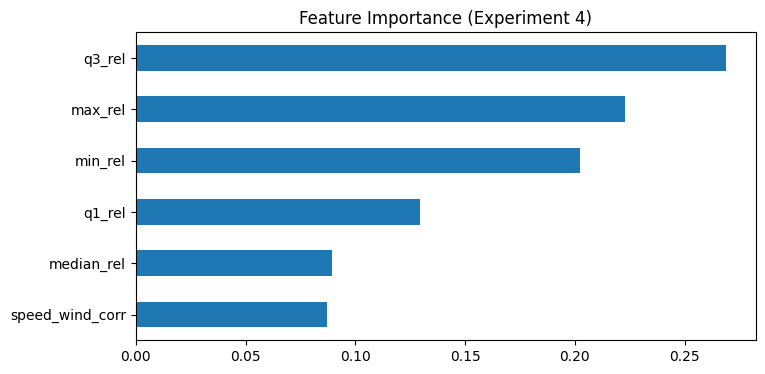

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# STEP 1: Five-number summary of relative speed
rel_summary_df = df.groupby("ID")["relative_speed"].agg(
    min_rel="min",
    q1_rel=lambda x: x.quantile(0.25),
    median_rel="median",
    q3_rel=lambda x: x.quantile(0.75),
    max_rel="max"
).reset_index()

# STEP 2: Correlation(ship speed, wind speed) per ship
corr_df = (df.groupby("ID").apply(lambda g: g["shipspeed"].corr(g["W"])).reset_index(name="speed_wind_corr"))

# STEP 3: Merge features + year labels
features_exp4 = rel_summary_df.merge(corr_df, on="ID")

# Attach year label (0 = 1849 sailing, 1 = 1949 powered)
features_exp4 = features_exp4.merge(df[["ID", "year"]].drop_duplicates(), on="ID")

# STEP 4: Machine Learning (Random Forest example)
X = features_exp4.drop(columns=["ID", "year"])
y = features_exp4["year"].apply(lambda x: 0 if x == 1849 else 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# STEP 5: Evaluation
y_pred = model.predict(X_test)
print("Experiment 4: Relative Speed + Correlation")
print(classification_report(y_test, y_pred))

# Optional: check feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind="barh", figsize=(8,4))
plt.title("Feature Importance (Experiment 4)")
plt.show()

## **Step 10 : Conclusion**

From the above experiments, we explored how ship speed and its relationship with environmental factors can be used to distinguish between **sailing ships of 1849** and **powered ships of 1949**:

- **Experiment 1 & 2** showed that descriptive statistics (five-number summaries) of ship speed already highlight differences between sailing and powered vessels.  
- **Experiment 3** extended this by considering relative speed and ship–wind relationships, offering stronger separation.  
- **Experiment 4** combined relative speed summaries with the correlation between ship speed and wind speed, then applied machine learning classifiers (Random Forest, SVC). Both models performed well, confirming that these features carry strong discriminatory power.  

The results suggest that powered ships travel faster and are less effected by wind compared to sailing ships, which aligns with historical expectations.  
By using both statistical summaries and machine learning, we demonstrated a consistent ability to classify vessel type from the ICOADS dataset.  

Overall, the experiments provide a data-driven validation of the transition from sail to steam power, with measurable differences in speed distributions and wind dependence.
